In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
df = pd.read_csv("C:/Users/91790/Downloads/Telecom+Customer+Churn - Copy/telecom_customer_churn.csv")


In [4]:
# Check data types and clean data
df['Gender'] = df['Gender'].astype('category')
df['Churn Category'] = pd.to_numeric(df['Churn Category'], errors='coerce')


In [5]:

# Check for missing values
print("Missing values:\n", df.isnull().sum())


Missing values:
 Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies 

In [6]:
# Explore churn reasons
churn_reason_counts = df['Churn Reason'].value_counts()
print("Churn Reason Counts:\n", churn_reason_counts.head())



Churn Reason Counts:
 Competitor had better devices    313
Competitor made better offer     311
Attitude of support person       220
Don't know                       130
Competitor offered more data     117
Name: Churn Reason, dtype: int64


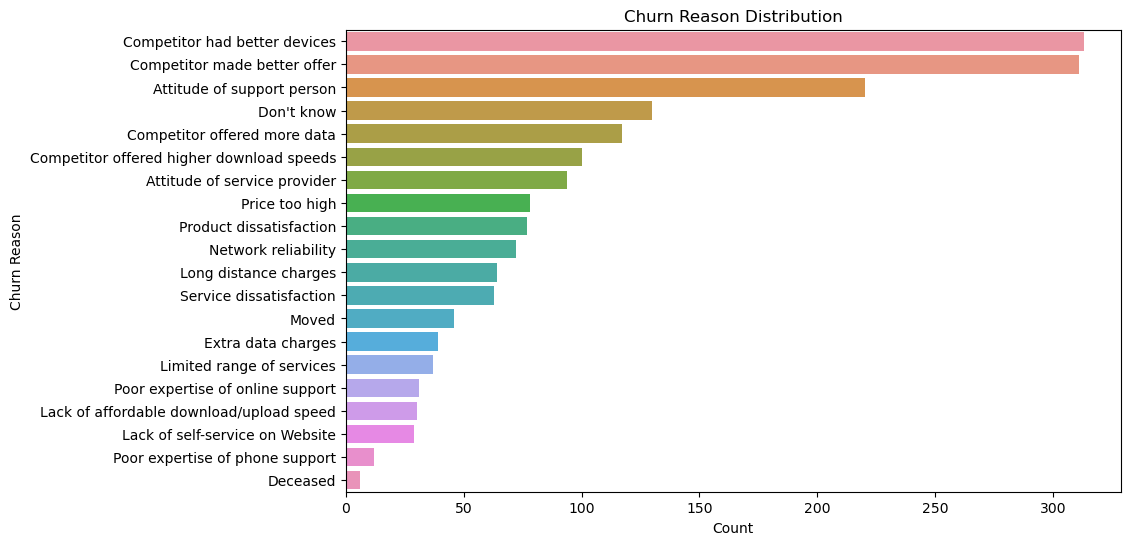

In [7]:
# Visualize churn reasons
plt.figure(figsize=(10, 6))
sns.countplot(y='Churn Reason', data=df, order=df['Churn Reason'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Churn Reason')
plt.title('Churn Reason Distribution')
plt.show()

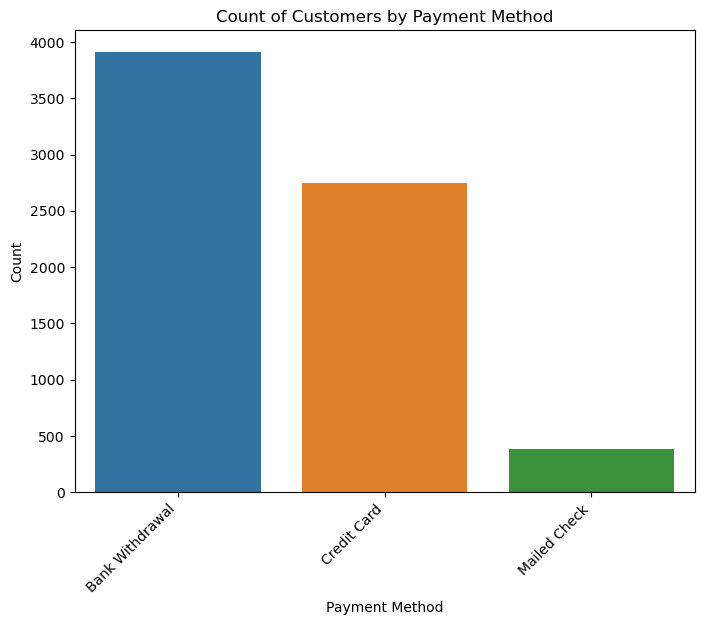

In [8]:
# Count the occurrences of each payment method
payment_counts = df['Payment Method'].value_counts()

# Visualize payment method counts
plt.figure(figsize=(8, 6))
sns.barplot(x=payment_counts.index, y=payment_counts.values)
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Count of Customers by Payment Method')
plt.xticks(rotation=45, ha='right')
plt.show()

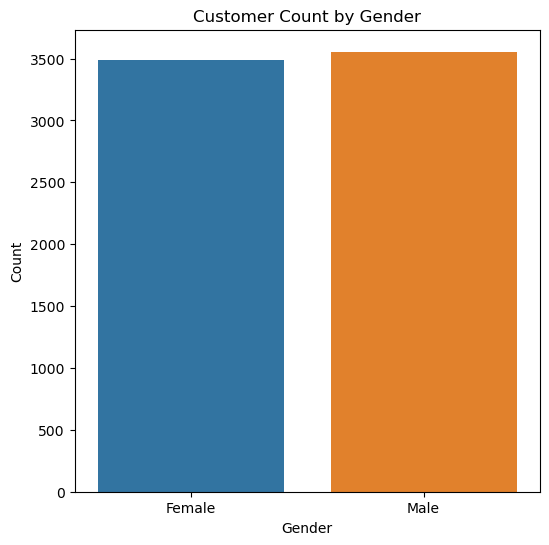

Gender Counts:
 Male      3555
Female    3488
Name: Gender, dtype: int64


In [9]:

# Count the occurrences of each gender
gender_counts = df['Gender'].value_counts()

# Visualize the counts in a bar chart
plt.figure(figsize=(6, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Customer Count by Gender')
plt.show()

print("Gender Counts:\n", gender_counts)

Total Revenue by Internet Type:
 Internet Type
Cable           2228474.23
DSL             4549289.55
Fiber Optic    12408074.43
Name: Total Revenue, dtype: float64


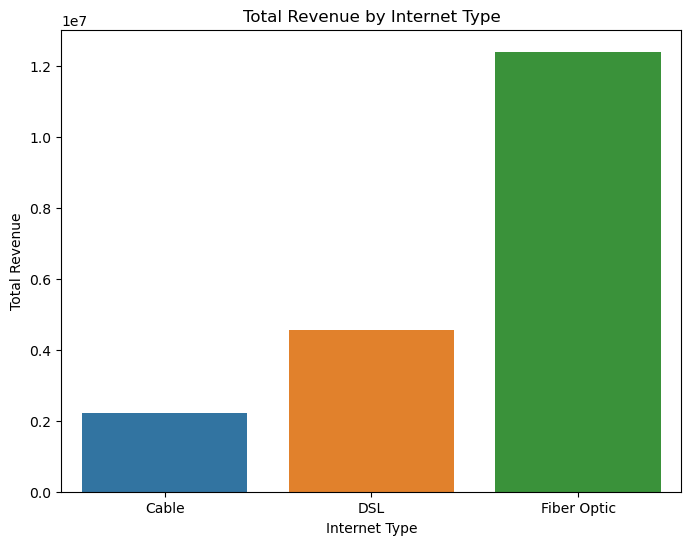

In [10]:
# Calculate total revenue by internet type
revenue_by_internet = df.groupby('Internet Type')['Total Revenue'].sum()
print("Total Revenue by Internet Type:\n", revenue_by_internet)

# Visualize total revenue by internet type
plt.figure(figsize=(8, 6))
sns.barplot(x=revenue_by_internet.index, y=revenue_by_internet.values)
plt.xlabel('Internet Type')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Internet Type')
plt.show()


Customer Status Counts:
 Stayed     4720
Churned    1869
Joined      454
Name: Customer Status, dtype: int64


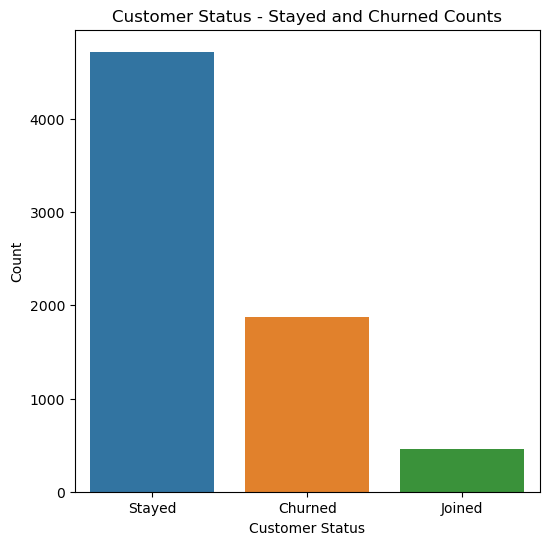

In [11]:
# Count stayed and churned customers in customer status
customer_status_counts = df['Customer Status'].value_counts()
print("Customer Status Counts:\n", customer_status_counts)

# Visualize customer status counts
plt.figure(figsize=(6, 6))
sns.barplot(x=customer_status_counts.index, y=customer_status_counts.values)
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.title('Customer Status - Stayed and Churned Counts')
plt.show()


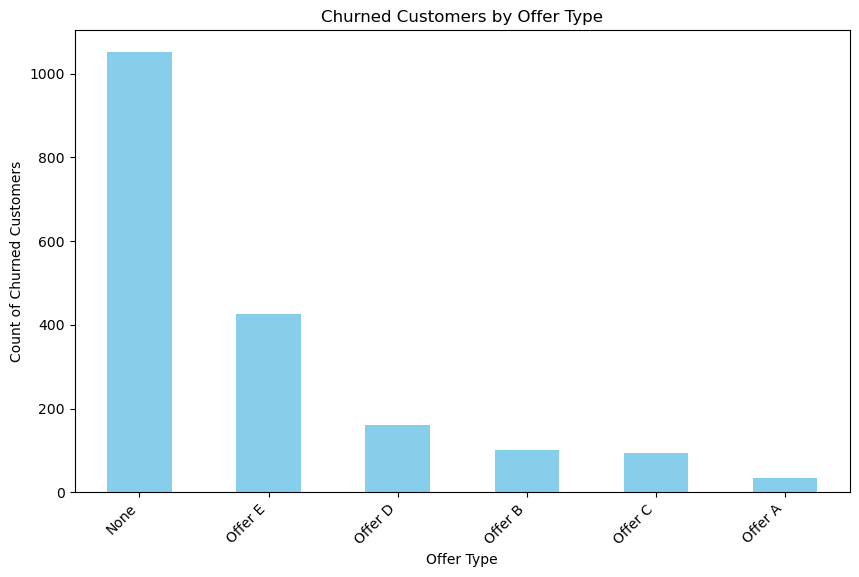

In [15]:
# Filter the dataset for churned customers
churned_customers = df[df['Customer Status'] == 'Churned']

# Count churned customers by offer type
offer_churned_count = churned_customers['Offer'].value_counts()

# Visualize churned customers by offer type
plt.figure(figsize=(10, 6))
offer_churned_count.plot(kind='bar', color='skyblue')
plt.xlabel('Offer Type')
plt.ylabel('Count of Churned Customers')
plt.title('Churned Customers by Offer Type')
plt.xticks(rotation=45, ha='right')
plt.show()


In [64]:
# Filter the dataset for churned customers
churned_customers = df[df['Customer Status'] == 'Churned']

# Get the count of churned customers by city
city_churned_counts = churned_customers['City'].value_counts()

# Sort the cities by churned customer count in descending order
top_10_cities = city_churned_counts.head(10)

# Display the top 10 cities with the most churned customers
print("Top 10 Cities with the Most Churned Customers:")
print(top_10_cities)


Top 10 Cities with the Most Churned Customers:
San Diego        185
Los Angeles       78
San Francisco     31
San Jose          29
Sacramento        26
Fallbrook         26
Temecula          22
Escondido         16
Long Beach        15
Oakland           13
Name: City, dtype: int64


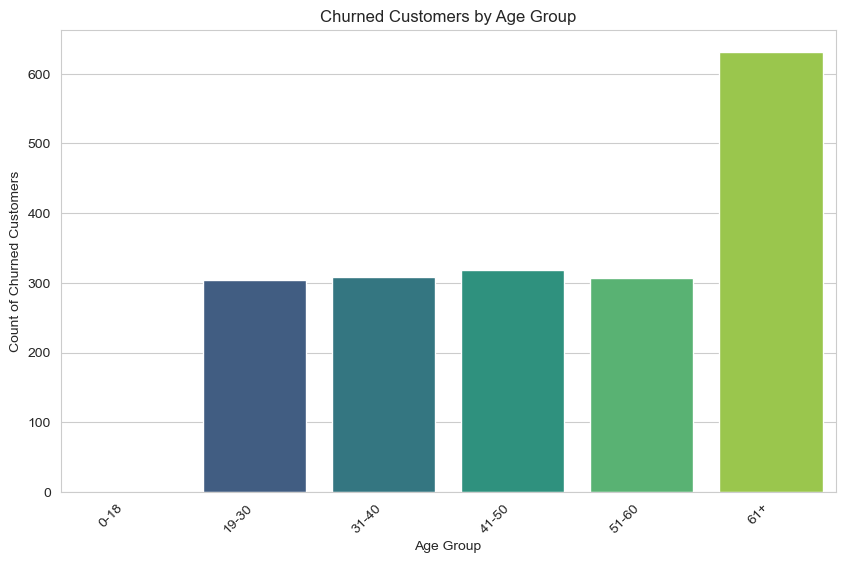

In [66]:
# Create age groups
bins = [0, 18, 30, 40, 50, 60, 100]  # Define age group bins
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61+']  # Define corresponding labels for age groups
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Filter the dataset for churned customers
churned_customers = df[df['Customer Status'] == 'Churned']

# Count churned customers by age group
age_churned_count = churned_customers['Age Group'].value_counts()

# Visualize churned customers by age group
plt.figure(figsize=(10, 6))
sns.barplot(x=age_churned_count.index, y=age_churned_count.values, palette='viridis')
plt.xlabel('Age Group')
plt.ylabel('Count of Churned Customers')
plt.title('Churned Customers by Age Group')
plt.xticks(rotation=45, ha='right')
plt.show()


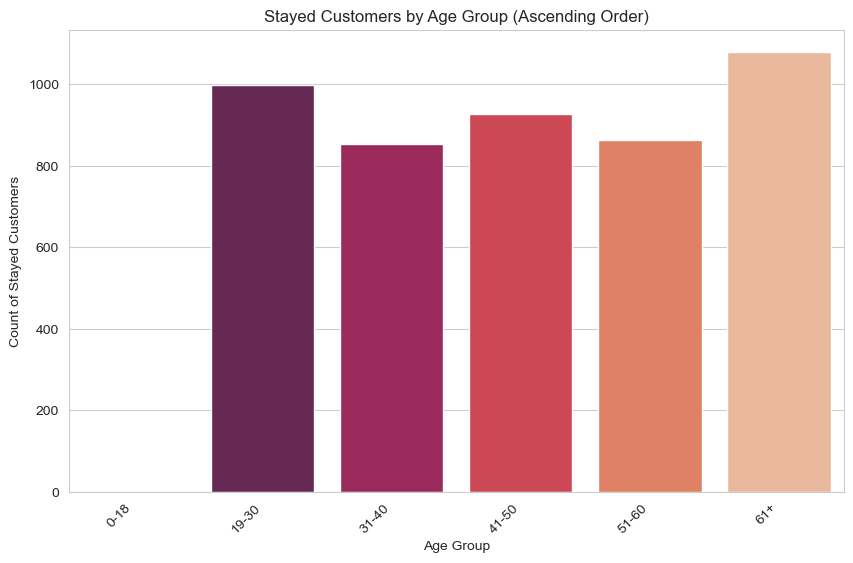

In [68]:
# Create age groups
bins = [0, 18, 30, 40, 50, 60, 100]  # Define age group bins
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61+']  # Define corresponding labels for age groups
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Filter the dataset for stayed customers
stayed_customers = df[df['Customer Status'] == 'Stayed']

# Sort the age_stayed_count Series by index (age group) in ascending order of count
age_stayed_count_sorted = age_stayed_count.sort_index()

# Visualize stayed customers by age group with bars arranged in ascending order
plt.figure(figsize=(10, 6))
sns.barplot(x=age_stayed_count_sorted.index, y=age_stayed_count_sorted.values, palette='rocket')
plt.xlabel('Age Group')
plt.ylabel('Count of Stayed Customers')
plt.title('Stayed Customers by Age Group (Ascending Order)')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
#Project Report: Telecom Customer Churn Analysis

1. Introduction:
    
The project aimed to analyze a Telecom customer churn dataset to understand various factors contributing to customer churn. The analysis involved exploring different aspects such as churn reasons, payment methods, gender distribution, total revenue by internet type, customer status distribution, churned customers by offer type, top cities with the most churned customers, and churned customers by age group.

2. Data Overview:

*The dataset contains information about Telecom customers, including demographic data, service usage, payment methods, and churn-related information.
*Initial data cleaning involved handling missing values, converting data types, and preparing the dataset for analysis.

3. Analysis and Visualizations:

3.1 Churn Reasons:

*Explored the top churn reasons:
*Competitor had better devices
*Competitor made a better offer
*Attitude of support person
*Don't know
*Competitor offered more data

*Visualized the distribution of churn reasons using a horizontal bar chart.

3.2 Payment Methods:

*Counted the occurrences of each payment method used by customers.
*Visualized the distribution of customers by payment method using a bar chart.

3.3 Gender Distribution:

*Counted the number of male and female customers.
*Visualized the gender distribution using a bar chart.

3.4 Total Revenue by Internet Type:

*Calculated the total revenue generated for each internet type (Cable, DSL, Fiber Optic).
*Visualized the total revenue by internet type using a bar chart.

3.5 Customer Status:

*Analyzed the distribution of customer statuses (Stayed, Churned, Joined).
*Visualized the customer status distribution using a bar chart.

3.6 Churned Customers by Offer Type:

*Filtered the dataset for churned customers and counted churned customers by offer type.
*Visualized the count of churned customers by offer type using a bar chart.

3.7 Top Cities with Most Churned Customers:

*Identified the top 10 cities with the most churned customers.
*Displayed the count of churned customers for each city in a bar chart.

3.8 Churned Customers by Age Group:

*Created age groups and counted churned customers within each age group.
*Visualized the count of churned customers by age group using a bar chart.


4. Conclusion:
    
The analysis provided valuable insights into the Telecom customer churn dataset. Key findings include the most common churn reasons, distribution of payment methods, gender representation, revenue contribution by internet type, customer status distribution, churned customers by offer type, top cities with high churn rates, and age group analysis of churned customers.